In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA

In [3]:
df= pd.read_csv('/Users/sa24/Desktop/Spotify TLAB/Spotify-Analysis/Raw data/Cleaned_Data.csv')

# prepping the data to create an Elbow plot
X1 = df.loc[:, ['len','dating', 'violence', 'world/life', 'night/time', 'shake the audience',
       'family/gospel', 'romantic', 'communication', 'obscene', 'music',
       'movement/places', 'light/visual perceptions', 'family/spiritual',
       'sadness', 'feelings', 'age']].values


# KMean without Scaling

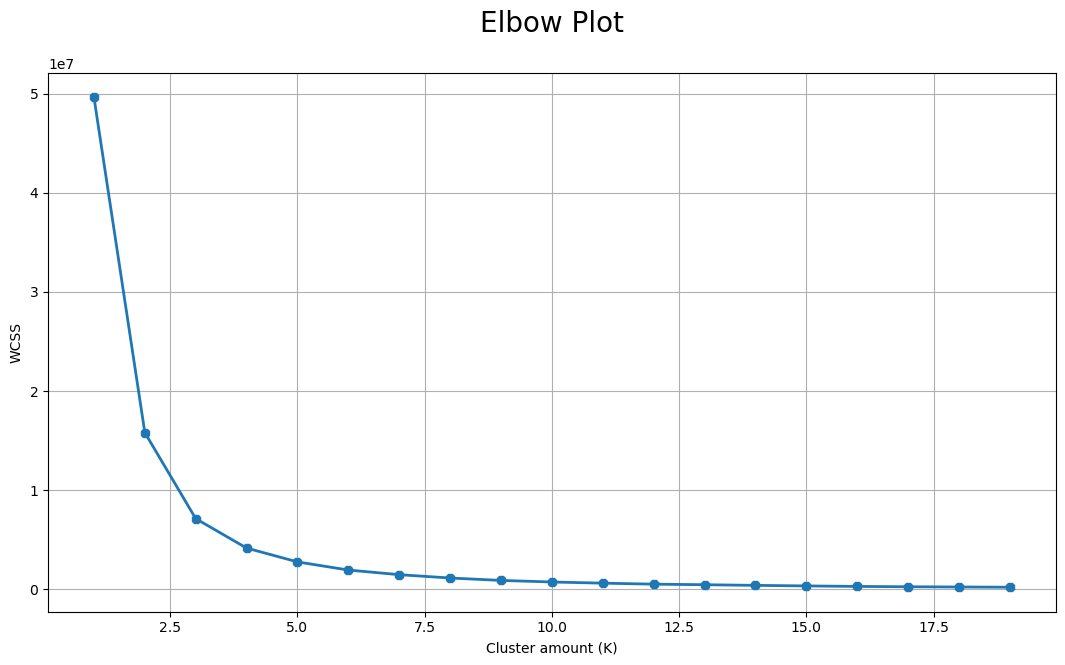

In [4]:
# creating the elbow with WSS
wcss = []
for k in range(1,20):
    kmeans = KMeans(n_clusters= k, init="k-means++" , random_state= 42)
    kmeans.fit(X1)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(13, 7))
plt.plot(range(1, 20), wcss, linewidth= 2, marker='8')
plt.title('Elbow Plot\n', fontsize= 20)
plt.xlabel("Cluster amount (K)")
plt.ylabel("WCSS")
plt.grid(True)
plt.show()

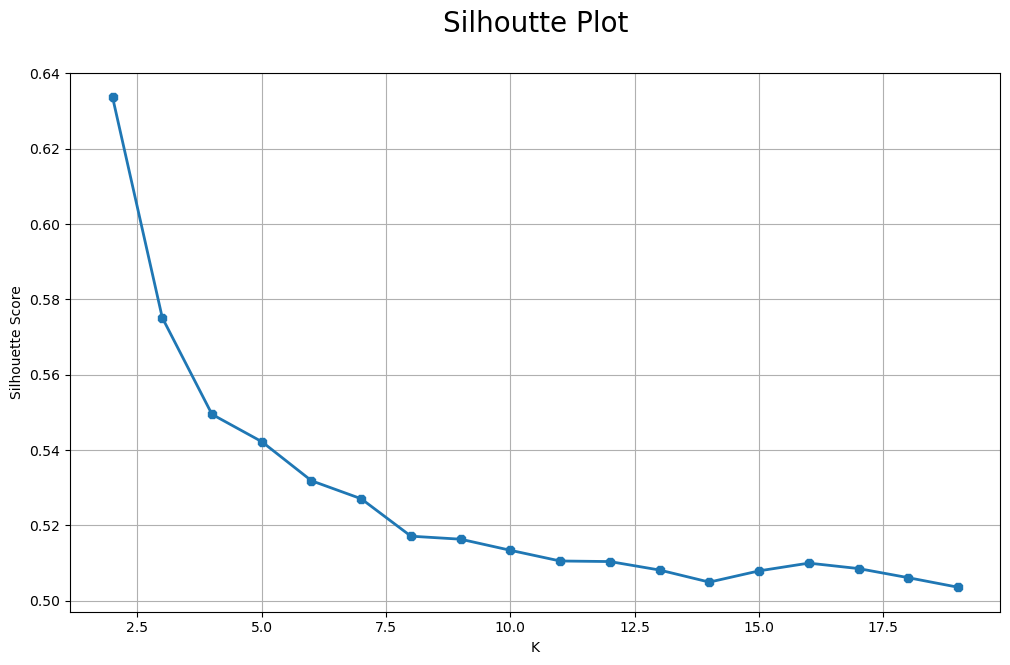

In [5]:
# Create a silhouette Score

silhouette = []
for k in range(2, 20):

    kmeans = KMeans(n_clusters = k, init = 'k-means++',random_state= 42)
    predictions = kmeans.fit_predict(X1)
    silhouette.append(metrics.silhouette_score(X1, predictions))

plt.figure(figsize = (12, 7))
plt.plot(range(2, 20), silhouette, linewidth = 2, marker = '8')
plt.title('Silhoutte Plot\n', fontsize = 20)
plt.xlabel('K')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()


In [6]:

kmeans= KMeans(n_clusters= 5, init = "k-means++", random_state= 42)
# Fit the model to the dataset
kmeans.fit(X1)
# Generate the labels for the dataset
labels= kmeans.fit_predict(X1)
labels


array([1, 3, 0, ..., 1, 3, 1], dtype=int32)

In [7]:
# Get the centroid of the clusters
kmeans.cluster_centers_

array([[3.31370598e+01, 2.11520822e-02, 9.34675026e-02, 1.41942406e-01,
        6.05448281e-02, 1.35581553e-02, 1.60246774e-02, 7.41851968e-02,
        8.24496131e-02, 4.12205796e-02, 7.10322406e-02, 3.06116615e-02,
        5.18861028e-02, 2.41653962e-02, 1.60201469e-01, 3.29232229e-02,
        5.06739599e-01],
       [9.10354075e+01, 2.02515405e-02, 1.46904617e-01, 1.08557749e-01,
        5.82872329e-02, 1.96479854e-02, 1.85039247e-02, 3.43076660e-02,
        7.47236588e-02, 1.00247169e-01, 5.53706318e-02, 5.60781362e-02,
        4.93290070e-02, 2.54993412e-02, 1.17331906e-01, 3.04399551e-02,
        3.66097408e-01],
       [1.28993900e+02, 2.02608925e-02, 1.38904971e-01, 9.66241301e-02,
        4.95373099e-02, 2.35382538e-02, 1.73764676e-02, 2.57427508e-02,
        6.66514781e-02, 1.86266963e-01, 4.57414474e-02, 6.38702860e-02,
        4.19784161e-02, 2.51232066e-02, 8.06660854e-02, 3.12824708e-02,
        3.15305756e-01],
       [6.12590065e+01, 2.27690265e-02, 1.22192449e-01, 1.275

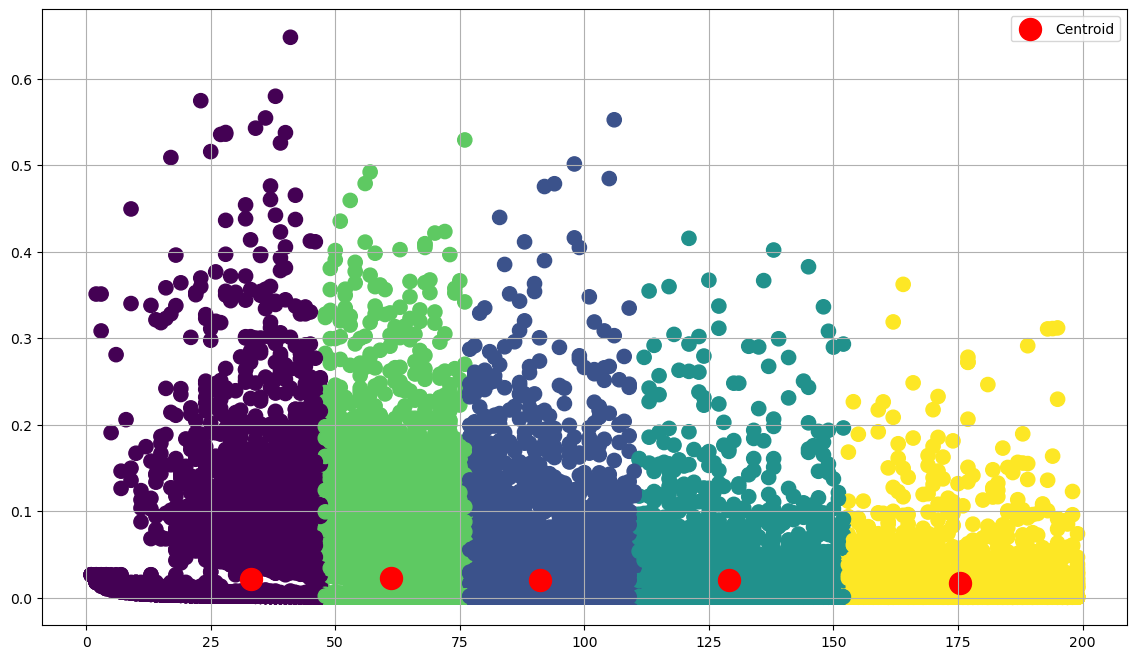

In [8]:
plt.figure(figsize = (14, 8))
plt.scatter(X1 [:, 0], X1[:, 1], c = kmeans.labels_, s = 105)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color = 'red', s = 250, label= "Centroid")
plt.title('')
plt.xlabel('')
plt.ylabel('')
plt.legend()
plt.grid(True)
plt.show()

# K Means Cluster with Scaling

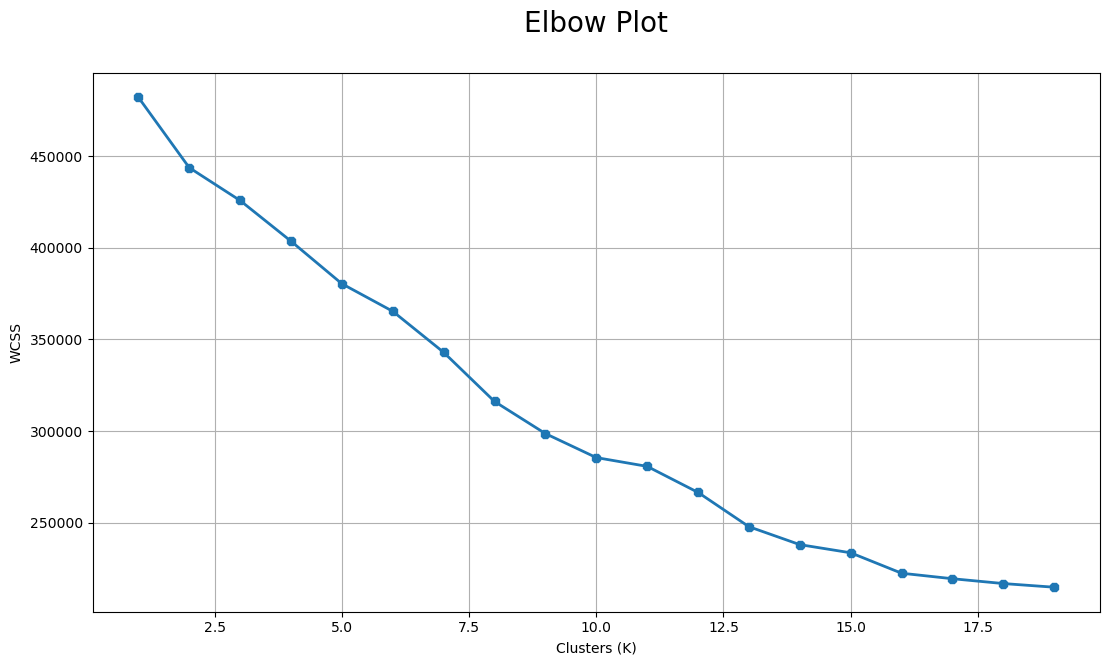

In [9]:
scaler = StandardScaler()

X1_scaled = scaler.fit_transform(X1)

wcss_scaled = []
for k in range(1, 20):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(X1_scaled)
    wcss_scaled.append(kmeans.inertia_)

plt.figure(figsize=(13, 7))
plt.plot(range(1, 20), wcss_scaled, linewidth=2, marker='8')
plt.title('Elbow Plot\n', fontsize=20)
plt.xlabel('Clusters (K)')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

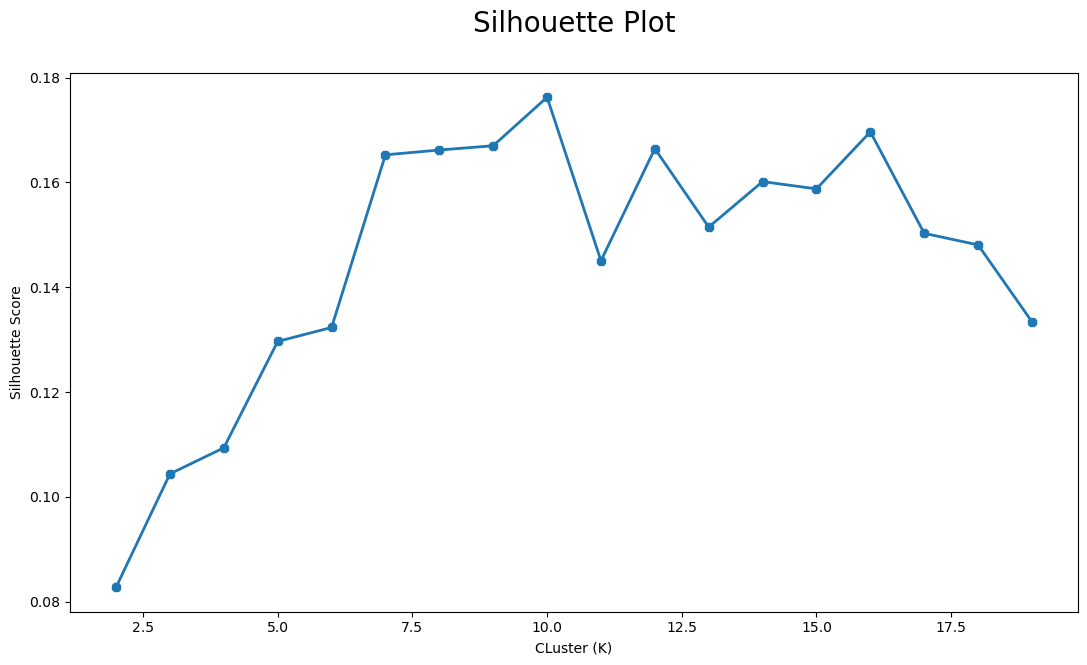

In [10]:
# Create Scaled Silhouette Score Plot 
silhouette_scaled = []
for k in range(2, 20):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    predictions = kmeans.fit_predict(X1_scaled)
    silhouette_scaled.append(metrics.silhouette_score(X1_scaled, predictions))

plt.figure(figsize = (13, 7))
plt.plot(range(2, 20), silhouette_scaled, linewidth = 2, marker = '8')
plt.title('Silhouette Plot\n', fontsize = 20)
plt.xlabel('CLuster (K)')
plt.ylabel('Silhouette Score')
plt.show()


# After doing both plots the best K seems to be 11

In [11]:
# Use the 11 clusters to make a new scaled KMeans object
kmeans_scaled = KMeans(n_clusters=11, init="k-means++", n_init=30, random_state =42)
kmeans_scaled.fit(X1_scaled)

KMeans(n_clusters=11, n_init=30, random_state=42)

In [12]:
#label the scaled data
labels = kmeans_scaled.fit_predict(X1_scaled)
labels

array([10,  5,  1, ...,  3,  3,  3], dtype=int32)

In [13]:
# Get the centroids
kmeans_scaled.cluster_centers_

array([[ 1.32946011e-01, -2.36190684e-01,  8.68747183e-02,
        -1.20824511e-01, -2.00872899e-01, -1.76257069e-01,
        -8.92371311e-02, -2.70511869e-01, -4.16347633e-01,
        -6.01395761e-03, -1.50964452e-01,  2.86268901e+00,
        -2.12868462e-01, -1.00420849e-01, -2.63980647e-01,
        -2.50028743e-01,  3.41264539e-02],
       [-2.41527653e-01, -1.35861045e-01, -4.56460673e-01,
        -4.18913277e-01, -2.24455881e-01, -6.95019835e-02,
        -6.09053799e-02, -2.02942165e-01, -9.14823731e-02,
        -3.87694362e-01,  2.89282493e+00, -7.75459995e-02,
         2.06001254e-01,  1.11957935e-01, -3.79929670e-01,
        -1.42010166e-01,  4.02627628e-01],
       [-2.16588246e-01,  4.18589768e+00, -3.22075482e-01,
        -1.69012077e-01,  2.22161507e-02,  8.59383693e-02,
        -3.24166693e-02,  4.85942186e-02, -2.79474170e-01,
        -1.54019629e-01, -3.35240064e-02, -3.12975938e-01,
        -2.94053836e-01, -2.04260061e-01, -1.72914515e-02,
        -5.49471330e-02,  2.9

/var/folders/fz/fjrs1yms7rbcd_w7wg96j1fm0000gn/T/ipykernel_68122/3270246090.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend( )


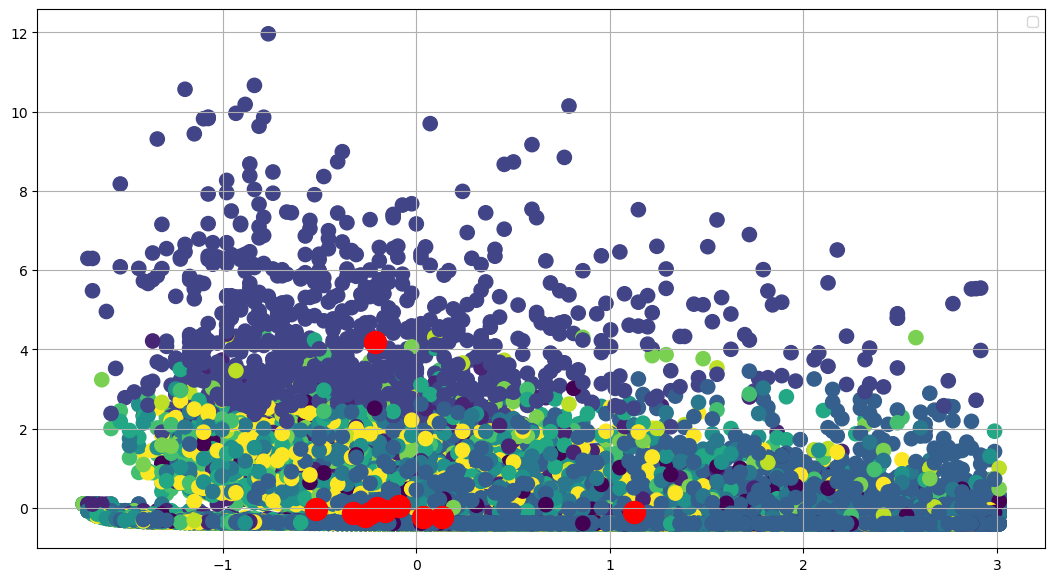

In [14]:
plt.figure(figsize = (13, 7))

plt.scatter(X1_scaled[:, 0], X1_scaled[:, 1], c = kmeans_scaled.labels_, s = 105)
plt.scatter(kmeans_scaled.cluster_centers_[:, 0], kmeans_scaled.cluster_centers_[:, 1], color = 'red', s = 250)
plt.legend( )
plt.xlabel('')
plt.ylabel('')
plt.grid(True)


plt.show()

# There are too many features to get a accureate read on the data. I'll have to use PCA to make it readable 

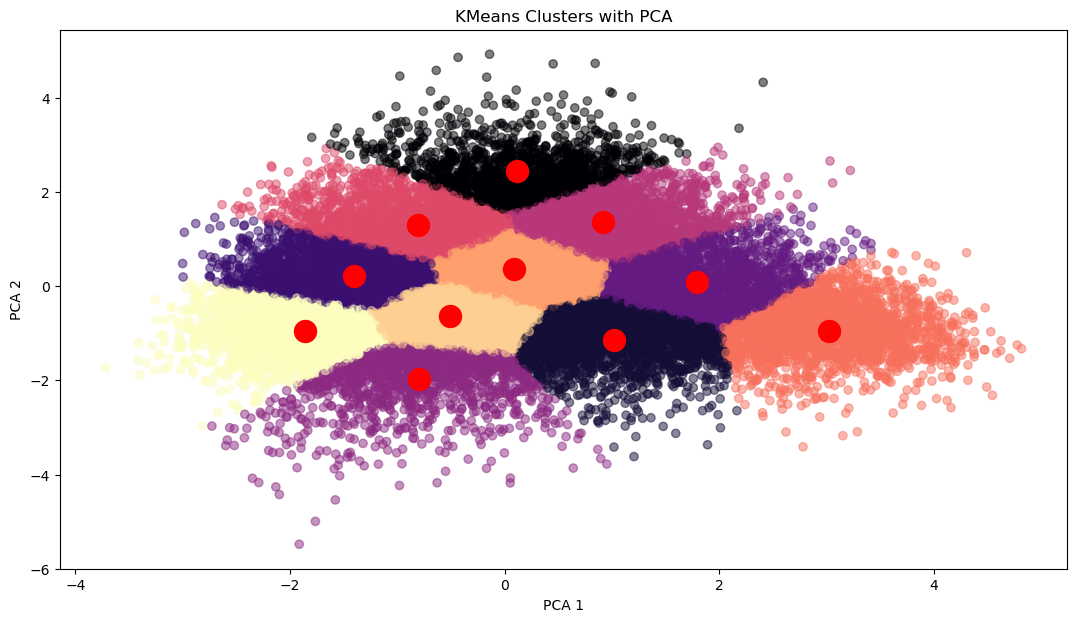

In [15]:
pca = PCA(n_components=2)
clean_pca = pca.fit_transform(X1_scaled)

clusters = kmeans_scaled.fit_predict(clean_pca)

plt.figure(figsize=(13, 7))
plt.scatter(clean_pca[:, 0], clean_pca[:, 1], c = clusters, cmap= "magma", alpha = 0.5)
plt.scatter(kmeans_scaled.cluster_centers_[:,0], kmeans_scaled.cluster_centers_[:,1], color="red", s=250)
plt.title('KMeans Clusters with PCA')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

# Using PCA we can see the cluster breakdown and that there are 11 clusters

In [17]:
# adding the cluster column back to the dataset
df['cluster'] = kmeans_scaled.fit_predict(X1_scaled)

# Load the raw dataset, then add categorical columns to clean dataset
raw_data= pd.read_csv("/Users/sa24/Desktop/Spotify TLAB/Spotify-Analysis/Raw data/train.csv")

label= raw_data[['genre', 'artist_name', 'track_name', 'release_date']]

label= pd.concat([label, df], axis=1)

label

,genre,artist_name,track_name,release_date,len,dating,violence,world/life,night/time,shake the audience,...,communication,obscene,music,movement/places,light/visual perceptions,family/spiritual,sadness,feelings,age,cluster
0,pop,mukesh,mohabbat bhi jhoothi,1950,95,0.000598,0.063746,0.000598,0.000598,0.000598,...,0.263751,0.000598,0.039288,0.000598,0.000598,0.000598,0.380299,0.117175,1.000000,10
1,pop,frankie laine,i believe,1950,51,0.035537,0.096777,0.443435,0.001284,0.001284,...,0.001284,0.001284,0.118034,0.001284,0.212681,0.051124,0.001284,0.001284,1.000000,5
2,pop,johnnie ray,cry,1950,24,0.002770,0.002770,0.002770,0.002770,0.002770,...,0.250668,0.002770,0.323794,0.002770,0.002770,0.002770,0.002770,0.225422,1.000000,1
3,pop,pérez prado,patricia,1950,54,0.048249,0.001548,0.001548,0.001548,0.021500,...,0.001548,0.001548,0.001548,0.129250,0.001548,0.001548,0.225889,0.001548,1.000000,7
4,pop,giorgos papadopoulos,apopse eida oneiro,1950,48,0.001350,0.001350,0.417772,0.001350,0.001350,...,0.001350,0.001350,0.001350,0.001350,0.001350,0.029755,0.068800,0.001350,1.000000,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28357,hip hop,mack 10,10 million ways,2019,78,0.001350,0.001350,0.001350,0.001350,0.001350,...,0.001350,0.391651,0.001350,0.435089,0.001350,0.001350,0.065664,0.001350,0.014286,0
28358,hip hop,m.o.p.,ante up (robbin hoodz theory),2019,67,0.001284,0.001284,0.035338,0.001284,0.001284,...,0.203889,0.318910,0.058152,0.134955,0.001284,0.001284,0.001284,0.001284,0.014286,3
28359,hip hop,nine,whutcha want?,2019,77,0.001504,0.154302,0.168988,0.001504,0.039755,...,0.001504,0.356685,0.001504,0.068684,0.001504,0.001504,0.001504,0.001504,0.014286,3
28360,hip hop,will smith,switch,2019,67,0.001196,0.001196,0.001196,0.001196,0.048359,...,0.001196,0.492434,0.103614,0.001196,0.202659,0.001196,0.001196,0.001196,0.014286,3


In [23]:
# see the amount of songs in each of the clusters
df['cluster'].value_counts().sort_index().to_frame(name='Song Amount')

,Song Amount
cluster,
0,1827
1,2172
2,913
3,4093
4,4762
5,4507
6,1799
7,1625
8,793


In [ ]:
# identify what songs are in cluster 2
label[df['cluster'] == 2].sample(10)

,genre,artist_name,track_name,release_date,len,dating,violence,world/life,night/time,shake the audience,...,communication,obscene,music,movement/places,light/visual perceptions,family/spiritual,sadness,feelings,age,cluster
15677,blues,bettye swann,angel of the morning,2004,60,0.171940,0.001012,0.101732,0.001012,0.001012,...,0.001012,0.001012,0.001012,0.001012,0.172844,0.001012,0.337281,0.076588,0.228571,2
24250,rock,the rolling stones,respectable,1978,61,0.303208,0.001350,0.416838,0.001350,0.027564,...,0.001350,0.001350,0.001350,0.206877,0.001350,0.001350,0.001350,0.001350,0.600000,2
22837,reggae,demarco,she cant wait,2011,164,0.362050,0.000650,0.000650,0.070468,0.000650,...,0.000650,0.544297,0.000650,0.000650,0.000650,0.013439,0.000650,0.000650,0.128571,2
3860,pop,the ocean blue,ballerina out of control,1991,53,0.152803,0.001284,0.156866,0.001284,0.001284,...,0.001284,0.001284,0.001284,0.001284,0.248626,0.001284,0.363948,0.001284,0.414286,2
2527,pop,yoko ono,give me something,1980,36,0.334033,0.414430,0.001595,0.001595,0.001595,...,0.001595,0.001595,0.001595,0.001595,0.001595,0.001595,0.001595,0.001595,0.571429,2
5036,pop,phantom planet,california,2002,53,0.459090,0.001698,0.001698,0.089846,0.001698,...,0.001698,0.391101,0.001698,0.001698,0.001698,0.001698,0.001698,0.001698,0.257143,2
5174,pop,john mayer,come back to bed,2003,64,0.309399,0.334543,0.000923,0.000923,0.000923,...,0.140377,0.000923,0.000923,0.000923,0.000923,0.000923,0.000923,0.071484,0.242857,2
18014,jazz,tower of power,what happened to the world that day,1972,97,0.156676,0.000591,0.430337,0.023573,0.063747,...,0.078217,0.000591,0.016616,0.000591,0.019479,0.000591,0.112004,0.000591,0.685714,2
24544,rock,ramones,the kkk took my baby away,1981,80,0.209768,0.000693,0.000693,0.000693,0.045788,...,0.000693,0.000693,0.089741,0.000693,0.000693,0.000693,0.535469,0.109539,0.557143,2
15062,blues,morphine,the saddest song,1993,51,0.208826,0.306644,0.001548,0.100498,0.001548,...,0.001548,0.001548,0.223041,0.001548,0.139319,0.001548,0.001548,0.001548,0.385714,2


# Add a description to each of the cluster rows

In [ ]:
column = ['len','dating', 'violence', 'world/life', 'night/time', 'shake the audience',
       'family/gospel', 'romantic', 'communication', 'obscene', 'music',
       'movement/places', 'light/visual perceptions', 'family/spiritual',
       'sadness', 'feelings', 'age']

# Create tehe DataFrame for the clusters
cluster_df = pd.DataFrame(kmeans_scaled.cluster_centers_, columns=column)
cluster_df.index = [f"Cluster {i}" for i in range(len(cluster_df))]

cluster_df

,len,dating,violence,world/life,night/time,shake the audience,family/gospel,romantic,communication,obscene,music,movement/places,light/visual perceptions,family/spiritual,sadness,feelings,age
Cluster 0,0.132946,-0.236191,0.086875,-0.120825,-0.200873,-0.176257,-0.089237,-0.270512,-0.416348,-0.006014,-0.150964,2.862689,-0.212868,-0.100421,-0.263981,-0.250029,0.034126
Cluster 1,-0.241528,-0.135861,-0.456461,-0.418913,-0.224456,-0.069502,-0.060905,-0.202942,-0.091482,-0.387694,2.892825,-0.077546,0.206001,0.111958,-0.379930,-0.142010,0.402628
Cluster 2,-0.216588,4.185898,-0.322075,-0.169012,0.022216,0.085938,-0.032417,0.048594,-0.279474,-0.154020,-0.033524,-0.312976,-0.294054,-0.204260,-0.017291,-0.054947,0.294673
Cluster 3,1.123339,-0.105319,-0.345422,-0.444650,-0.277703,0.261964,-0.105755,-0.332632,-0.036501,2.077328,-0.305074,-0.008316,-0.232538,-0.135186,-0.569738,-0.182728,-0.509478
Cluster 4,0.031695,-0.230010,1.810657,-0.370825,-0.229814,-0.009044,-0.161443,-0.260471,0.013416,-0.385144,-0.297477,-0.234775,0.156094,0.206693,-0.412497,-0.149692,-0.266248
Cluster 5,-0.267316,-0.195289,-0.418025,1.835561,-0.223031,-0.048676,-0.175457,-0.173331,0.075165,-0.407191,-0.251376,-0.267381,0.100141,0.135494,-0.349654,-0.098850,0.075492
Cluster 6,-0.202634,0.000077,-0.426937,-0.403591,3.085401,0.054999,-0.129852,-0.167504,0.045185,-0.351879,-0.239846,-0.139123,-0.044456,-0.153176,-0.382978,-0.050698,0.068560
Cluster 7,-0.520041,-0.032043,-0.513762,-0.303001,-0.163412,-0.084989,-0.106692,3.369277,0.039355,-0.451319,-0.171255,-0.307332,0.116625,-0.148808,-0.294105,-0.107062,0.647808
Cluster 8,-0.087973,0.055841,-0.385113,-0.345960,-0.133447,0.074162,-0.043785,-0.180069,0.022162,-0.300366,-0.235640,-0.121651,-0.195572,-0.123182,-0.348748,4.720753,0.105256
Cluster 9,-0.160419,-0.064226,-0.066488,-0.068994,-0.077240,-0.020703,4.369424,-0.100647,-0.269390,-0.110292,-0.055446,-0.161664,-0.281509,0.035617,-0.122213,-0.105572,0.271016


# Now we'll get the best features to describe each cluster

In [25]:
cluster_features = {}

for i in range(len(cluster_df)):
    cluster_features[f"Cluster {i}"] = cluster_df.iloc[i].sort_values(ascending=False).head(3).index.tolist()

cluster_features

{'Cluster 0': ['movement/places', 'len', 'violence'],
 'Cluster 1': ['music', 'age', 'light/visual perceptions'],
 'Cluster 2': ['dating', 'age', 'shake the audience'],
 'Cluster 3': ['obscene', 'len', 'shake the audience'],
 'Cluster 4': ['violence', 'family/spiritual', 'light/visual perceptions'],
 'Cluster 5': ['world/life', 'family/spiritual', 'light/visual perceptions'],
 'Cluster 6': ['night/time', 'age', 'shake the audience'],
 'Cluster 7': ['romantic', 'age', 'light/visual perceptions'],
 'Cluster 8': ['feelings', 'age', 'shake the audience'],
 'Cluster 9': ['family/gospel', 'age', 'family/spiritual'],
 'Cluster 10': ['sadness', 'communication', 'age']}

In [26]:
# see what songs are in cluster 10
label[df['cluster'] == 10]

,genre,artist_name,track_name,release_date,len,dating,violence,world/life,night/time,shake the audience,...,communication,obscene,music,movement/places,light/visual perceptions,family/spiritual,sadness,feelings,age,cluster
0,pop,mukesh,mohabbat bhi jhoothi,1950,95,0.000598,0.063746,0.000598,0.000598,0.000598,...,0.263751,0.000598,0.039288,0.000598,0.000598,0.000598,0.380299,0.117175,1.000000,10
9,pop,stélios kazantzídis,finito la mouzika,1950,61,0.001120,0.102548,0.001120,0.053944,0.001120,...,0.091572,0.001120,0.001120,0.105752,0.001120,0.001120,0.630507,0.001120,1.000000,10
13,pop,ghantasala,kanugona galano,1951,73,0.000786,0.000786,0.150691,0.000786,0.000786,...,0.090114,0.000786,0.173311,0.000786,0.085106,0.000786,0.445469,0.045097,0.985714,10
20,pop,mohammed rafi,jahan men log sachhe ashikon ko,1952,84,0.000693,0.392821,0.000693,0.000693,0.043832,...,0.000693,0.000693,0.000693,0.000693,0.033295,0.000693,0.435351,0.000693,0.971429,10
29,pop,lata mangeshkar,maagata maagata janm gele,1953,52,0.001949,0.339023,0.001949,0.120790,0.001949,...,0.173571,0.001949,0.001949,0.001949,0.001949,0.001949,0.297788,0.001949,0.957143,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27833,hip hop,nate millyunz,all my life,2013,89,0.000675,0.076159,0.124862,0.000675,0.000675,...,0.081912,0.000675,0.000675,0.000675,0.000675,0.000675,0.672882,0.000675,0.100000,10
27837,hip hop,todd terry,do your thing,2013,70,0.000797,0.314809,0.093795,0.043174,0.000797,...,0.000797,0.000797,0.000797,0.000797,0.073246,0.000797,0.377972,0.030609,0.100000,10
28003,hip hop,nate dogg,backdoor,2017,50,0.064835,0.001350,0.120630,0.001350,0.001350,...,0.001350,0.001350,0.230745,0.001350,0.001350,0.001350,0.387352,0.001350,0.042857,10
28150,hip hop,hazhe,fuck you,2018,73,0.001074,0.125875,0.001074,0.001074,0.001074,...,0.094141,0.001074,0.022787,0.001074,0.072738,0.061333,0.303836,0.001074,0.028571,10


# Perform a new sample prediciton

In [27]:
new_sample = pd.read_csv("/Users/sa24/Desktop/Spotify TLAB/Spotify-Analysis/Raw data/recommend.csv")

In [28]:
# drop all the unneeded columns
clean_sample = new_sample.drop(["Unnamed: 0","artist_name","lyrics", "track_name", "genre", "topic", "like/girls", "release_date"], axis=1)
clean_sample

,len,dating,violence,world/life,night/time,shake the audience,family/gospel,romantic,communication,obscene,music,movement/places,light/visual perceptions,family/spiritual,sadness,feelings,age
0,74,0.000907,0.348191,0.375448,0.000907,0.225414,0.000907,0.000907,0.000907,0.000907,0.019389,0.000907,0.000907,0.000907,0.000907,0.018854,0.314286
1,43,0.001224,0.029943,0.001224,0.306688,0.001224,0.033440,0.069637,0.426669,0.001224,0.001224,0.001224,0.001224,0.001224,0.001224,0.062092,0.385714
2,54,0.001120,0.482490,0.001120,0.001120,0.001120,0.113651,0.001120,0.001120,0.001120,0.001120,0.001120,0.078222,0.001120,0.031571,0.202862,0.428571
3,25,0.204740,0.002506,0.002506,0.129818,0.002506,0.002506,0.002506,0.002506,0.002506,0.002506,0.002506,0.002506,0.002506,0.474607,0.002506,0.857143
4,97,0.001170,0.001170,0.001170,0.050289,0.001170,0.023530,0.541449,0.001170,0.001170,0.001170,0.001170,0.314626,0.001170,0.001170,0.001170,0.771429
5,57,0.001462,0.487965,0.140561,0.001462,0.001462,0.001462,0.001462,0.238731,0.001462,0.001462,0.001462,0.001462,0.077630,0.001462,0.034645,0.971429
6,152,0.000675,0.000675,0.134044,0.293819,0.000675,0.000675,0.012990,0.066012,0.460145,0.000675,0.000675,0.000675,0.024217,0.000675,0.000675,0.285714
7,37,0.051874,0.001645,0.001645,0.084118,0.037341,0.001645,0.001645,0.460564,0.001645,0.001645,0.001645,0.001645,0.001645,0.314594,0.001645,0.714286
8,41,0.001504,0.001504,0.132148,0.492312,0.001504,0.001504,0.001504,0.321439,0.001504,0.001504,0.001504,0.001504,0.001504,0.001504,0.001504,0.485714
9,91,0.000711,0.543658,0.114697,0.098286,0.014720,0.000711,0.000711,0.075524,0.000711,0.000711,0.000711,0.000711,0.000711,0.118886,0.015028,0.157143


In [ ]:
# Create new variables
new_prediction = clean_sample.loc[:, ['dating', 'violence', 'world/life', 'night/time', 'shake the audience',
       'family/gospel', 'romantic', 'communication', 'obscene', 'music',
       'movement/places', 'light/visual perceptions', 'family/spiritual',
       'sadness', 'feelings', 'age', 'len']].values 


# Scale the test data

scaler = StandardScaler()
scaled_prediciton = scaler.fit_transform(new_prediction)

# Fit the KMeans model and assign cluster labels to original dataframe
clean_sample['cluster'] = kmeans_scaled.predict(scaled_prediciton)

clean_sample


,len,dating,violence,world/life,night/time,shake the audience,family/gospel,romantic,communication,obscene,music,movement/places,light/visual perceptions,family/spiritual,sadness,feelings,age,cluster
0,74,0.000907,0.348191,0.375448,0.000907,0.225414,0.000907,0.000907,0.000907,0.000907,0.019389,0.000907,0.000907,0.000907,0.000907,0.018854,0.314286,6
1,43,0.001224,0.029943,0.001224,0.306688,0.001224,0.033440,0.069637,0.426669,0.001224,0.001224,0.001224,0.001224,0.001224,0.001224,0.062092,0.385714,5
2,54,0.001120,0.482490,0.001120,0.001120,0.001120,0.113651,0.001120,0.001120,0.001120,0.001120,0.001120,0.078222,0.001120,0.031571,0.202862,0.428571,10
3,25,0.204740,0.002506,0.002506,0.129818,0.002506,0.002506,0.002506,0.002506,0.002506,0.002506,0.002506,0.002506,0.002506,0.474607,0.002506,0.857143,1
4,97,0.001170,0.001170,0.001170,0.050289,0.001170,0.023530,0.541449,0.001170,0.001170,0.001170,0.001170,0.314626,0.001170,0.001170,0.001170,0.771429,0
5,57,0.001462,0.487965,0.140561,0.001462,0.001462,0.001462,0.001462,0.238731,0.001462,0.001462,0.001462,0.001462,0.077630,0.001462,0.034645,0.971429,4
6,152,0.000675,0.000675,0.134044,0.293819,0.000675,0.000675,0.012990,0.066012,0.460145,0.000675,0.000675,0.000675,0.024217,0.000675,0.000675,0.285714,5
7,37,0.051874,0.001645,0.001645,0.084118,0.037341,0.001645,0.001645,0.460564,0.001645,0.001645,0.001645,0.001645,0.001645,0.314594,0.001645,0.714286,7
8,41,0.001504,0.001504,0.132148,0.492312,0.001504,0.001504,0.001504,0.321439,0.001504,0.001504,0.001504,0.001504,0.001504,0.001504,0.001504,0.485714,5
9,91,0.000711,0.543658,0.114697,0.098286,0.014720,0.000711,0.000711,0.075524,0.000711,0.000711,0.000711,0.000711,0.000711,0.118886,0.015028,0.157143,4


In [32]:
# bring back the drop columsn and concatinate them with the test data
returning_label = new_sample[["artist_name","lyrics", "track_name", "genre", "topic", "like/girls", "release_date"]]

test_label = pd.concat([returning_label, clean_sample], axis=1)

clean_sample['cluster'].value_counts().sort_index().to_frame()

,count
cluster,
0,1
1,1
4,2
5,3
6,1
7,1
10,1


In [33]:
test_label[clean_sample['cluster'] == 5]

,artist_name,lyrics,track_name,genre,topic,like/girls,release_date,len,dating,violence,...,communication,obscene,music,movement/places,light/visual perceptions,family/spiritual,sadness,feelings,age,cluster
1,dennis brown,maybe maybe treat good feel second best girl s...,second chance,reggae,night/time,0.056842,1993,43,0.001224,0.029943,...,0.426669,0.001224,0.001224,0.001224,0.001224,0.001224,0.001224,0.062092,0.385714,5
6,rage against the machine,pistolgrip pump time pistolgrip pump time pist...,pistol grip pump,rock,obscene,0.000675,2000,152,0.000675,0.000675,...,0.066012,0.460145,0.000675,0.000675,0.000675,0.024217,0.000675,0.000675,0.285714,5
8,randy travis,say thing care hang long ahead leave start mes...,messin' with my mind,country,night/time,0.001504,1986,41,0.001504,0.001504,...,0.321439,0.001504,0.001504,0.001504,0.001504,0.001504,0.001504,0.001504,0.485714,5
